In [282]:
# Import pandasa, os, and matplotlib.pyplot modules.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
# Import data.

df_flight = pd.read_csv('flights.csv')
df_airport = pd.read_csv('airports.csv')
df_airline = pd.read_csv('airlines.csv')

C:\Users\wfgyi\AppData\Local\Temp\ipykernel_36028\3906611510.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flight = pd.read_csv('flights.csv')


In [284]:
df_flight.info()
df_airport.info()
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [285]:
df_flight.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [286]:
# Since the cancellation reason and delay reason columns contain a significant amount of
# NaN values and also these columns do not directly relate to our investigation which
# targets at the impact of airports, airlines and flights on flight delays and cancellations,
# these columns will be dropped.

col = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_flight = df_flight[df_flight.columns[~df_flight.columns.isin(col)]]

In [287]:
# Verify if all data entry 'YEAR' is 2015.  If so, delete 'YEAR' column.  

print(df_flight['YEAR'].mean())
df_flight.drop('YEAR', axis=1, inplace=True)
df_flight.isnull().sum()

2015.0


MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [288]:
# Verify that the total number of missing 'ARRIVAL_DELAY' values equals the total number of 
#'DIVERTED' and 'CANCELLED' flights. 

df_flight['DIVERTED'].sum() + df_flight['CANCELLED'].sum()

105071

In [289]:
# Drop all flights that arrived early or on time.

df_flight = df_flight.drop(df_flight[df_flight.ARRIVAL_DELAY <= 0].index)

array([[<AxesSubplot:title={'center':'ARRIVAL_DELAY'}>]], dtype=object)

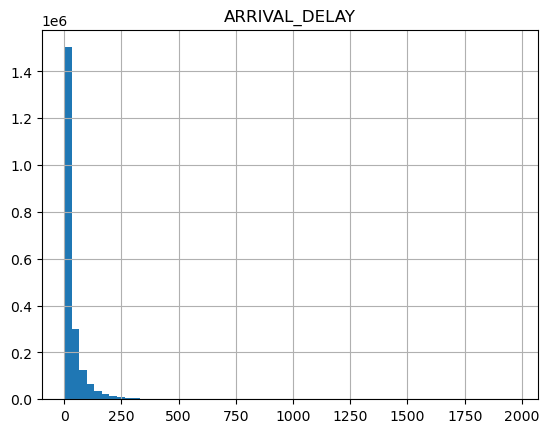

In [290]:
df_flight.hist(column='ARRIVAL_DELAY', bins=60)

In [291]:
# 'ARRIVAL_DELAY' columns have some extremely large numbers.  A closer look at these numbers 
# shows they are valid since the delay in those cases exceeded 24 hours.

df_flight[df_flight.ARRIVAL_DELAY>1440].sample(10)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
1278418,3,24,2,AA,1279,N559AA,OMA,DFW,1103,1352.0,...,101.0,90.0,583,1528.0,5.0,1255,1533.0,1598.0,0,0
311492,1,21,3,AA,2385,N4XNAA,JAX,DFW,1223,1240.0,...,167.0,144.0,918,1418.0,9.0,1415,1427.0,1452.0,0,0
4103531,9,13,7,AA,1063,N3CAAA,SAN,DFW,700,1050.0,...,174.0,142.0,1171,1538.0,6.0,1159,1544.0,1665.0,0,0
155090,1,11,7,AA,1595,N469AA,AUS,DFW,650,700.0,...,59.0,37.0,190,751.0,8.0,755,759.0,1444.0,0,0
396544,1,27,2,AA,1242,N586AA,FAT,DFW,659,850.0,...,186.0,155.0,1313,1344.0,12.0,1210,1356.0,1546.0,0,0
949876,3,4,3,AA,270,N5DJAA,HNL,LAX,828,1057.0,...,314.0,282.0,2556,1802.0,9.0,1555,1811.0,1576.0,0,0
5279939,11,27,5,AA,2559,N489AA,DTW,ORD,1027,1338.0,...,89.0,56.0,235,1348.0,19.0,1049,1407.0,1638.0,0,0
886984,2,28,6,AA,1312,N028AA,STL,MIA,620,847.0,...,208.0,131.0,1068,1309.0,6.0,1008,1315.0,1627.0,0,0
2688825,6,19,5,AA,269,N4WTAA,SMF,DFW,520,600.0,...,187.0,167.0,1431,1059.0,8.0,1044,1107.0,1463.0,0,0
1342320,3,28,6,AA,1168,N3FJAA,FLL,ORD,815,836.0,...,195.0,175.0,1182,1045.0,6.0,1036,1051.0,1455.0,0,0


In [292]:
# Delete rows irrelevant to the investigation.

irrelevant = ['DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN']
df_flight = df_flight[df_flight.columns[~df_flight.columns.isin(irrelevant)]]

In [293]:
# For 'DIVERTED' and 'CANCELLED' flights, replace 'ARRIVAL_DELAY' NaN values with 0.  

df_flight['ARRIVAL_DELAY'] = df_flight['ARRIVAL_DELAY'].fillna(0)
df_flight['ARRIVAL_DELAY'].describe()

count    2.191967e+06
mean     3.152573e+01
std      5.214012e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.400000e+01
75%      3.600000e+01
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

In [294]:
df_flight.isna().sum()

MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           92513
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
dtype: int64

In [295]:
# The 3 columns with NaN values are nice to have, but not absolutely necessary for the 
# investigation.  We can use scheduled departure time for the purpose of the investigation.  
# Therefore, we don't actually need these 3 columns.

df_flight = df_flight.drop(['TAIL_NUMBER', 'DEPARTURE_TIME', 'ARRIVAL_TIME'], axis=1)

In [296]:
df_flight.isna().sum()
df_flight.sample(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED
223437,1,15,4,EV,4105,IAH,PNS,1310,1438,20.0,0,0
2547170,6,10,3,AS,696,SEA,GEG,1605,1700,4.0,0,0
5806648,12,31,4,UA,1704,LAS,EWR,605,1400,328.0,0,0
1604269,4,13,1,MQ,3417,MAF,DFW,1253,1410,141.0,0,0
2919275,7,2,4,UA,278,ORD,ALB,1730,2037,33.0,0,0


In [297]:
# Check duplicate records.

df_flight['index_origin'] = df_flight.groupby(['MONTH', 'DAY', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT']).MONTH.transform('idxmin')    
duplicate = df_flight[df_flight.duplicated(subset=['MONTH','DAY','AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT'], keep='first')]

In [298]:
print(duplicate)

         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
3883017      8   29            6      AA            803            STT   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  \
3883017                 SJU                 1435               1500   

         ARRIVAL_DELAY  DIVERTED  CANCELLED  index_origin  
3883017            0.0         0          1       3883016  


In [299]:
# Checked the duplicated records and confirmed that they are not duplicate dues to 
# different destination airports.

print(df_flight.iloc[[1556755, 1556756]])

         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
3883016      8   29            6      AA            803            STT   
3883017      8   29            6      AA            803            STT   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  \
3883016                 CLT                 1435               1827   
3883017                 SJU                 1435               1500   

         ARRIVAL_DELAY  DIVERTED  CANCELLED  index_origin  
3883016            0.0         0          1       3883016  
3883017            0.0         0          1       3883016  


In [300]:
df_flight = df_flight.drop(['index_origin'], axis=1)

In [301]:
# Add 'ORIGIN_AIRPORT' and 'ORIGIN_STATE' to df by left joining df_airport with df.

df_airport = df_airport.drop(['LATITUDE','LONGITUDE', 'COUNTRY','AIRPORT'], axis=1)
df_airport.rename(columns = {'IATA_CODE':'ORIGIN_AIRPORT'}, inplace = True)

df = pd.merge(df_flight, df_airport, how = 'left', on = ['ORIGIN_AIRPORT'])
df.rename(columns = {'CITY':'ORIGIN_CITY', 'STATE':'ORIGIN_STATE'}, inplace = True)

In [302]:
print(df[df['ORIGIN_CITY'].isna()])

         MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
1703379     10    1            4      AA            260          12892   
1703380     10    1            4      AA           1965          12892   
1703381     10    1            4      DL           2324          14869   
1703382     10    1            4      AA           1051          14771   
1703383     10    1            4      NK            520          12889   
...        ...  ...          ...     ...            ...            ...   
1847911     10   31            6      AA            272          14771   
1847912     10   31            6      B6           1248          12889   
1847913     10   31            6      B6            688          12892   
1847914     10   31            6      B6           1503          12478   
1847915     10   31            6      UA            717          12892   

        DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  SCHEDULED_ARRIVAL  \
1703379               13303             

In [303]:
# The null values are caused by 'IATA_CODE' being a 5-digit-number.  As we know, 
# IATA_CODE is a standard 3-letter-code. Therefore, the 5-digit-numbered IATA_CODE values 
# in the original df_flight file are incorrect and should be replaced.

df = df.fillna('Unknown')

In [304]:
# Repeat the above process for the destination airports.

df_airport.rename(columns = {'ORIGIN_AIRPORT':'DESTINATION_AIRPORT'}, inplace = True)

df = pd.merge(df, df_airport, how = 'left', on = ['DESTINATION_AIRPORT'])
df.rename(columns = {'CITY':'DESTINATION_CITY', 'STATE':'DESTINATION_STATE'}, inplace = True)

df = df.fillna('Unknown')

In [305]:
# Add airline name to the df by left join.

df.rename(columns = {'AIRLINE':'IATA_CODE'}, inplace = True)
df = pd.merge(df, df_airline, how = 'left', on = ['IATA_CODE'])

In [306]:
# Double check to ensure all numbers match and fit.

delayed = np.count_nonzero(df['ARRIVAL_DELAY'])
diverted = df['DIVERTED'].sum()
cancelled = df['CANCELLED'].sum()

print('Total Delayed:', delayed)
print('Total Divereted:', diverted)
print('Total Cancelled:', cancelled)
print('Total:', delayed + diverted + cancelled)

Total Delayed: 2086896
Total Divereted: 15187
Total Cancelled: 89884
Total: 2191967


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191967 entries, 0 to 2191966
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   IATA_CODE            object 
 4   FLIGHT_NUMBER        int64  
 5   ORIGIN_AIRPORT       object 
 6   DESTINATION_AIRPORT  object 
 7   SCHEDULED_DEPARTURE  int64  
 8   SCHEDULED_ARRIVAL    int64  
 9   ARRIVAL_DELAY        float64
 10  DIVERTED             int64  
 11  CANCELLED            int64  
 12  ORIGIN_CITY          object 
 13  ORIGIN_STATE         object 
 14  DESTINATION_CITY     object 
 15  DESTINATION_STATE    object 
 16  AIRLINE              object 
dtypes: float64(1), int64(8), object(8)
memory usage: 301.0+ MB


In [311]:
df.sample(10)

,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE,AIRLINE
2141618,12,26,6,UA,1788,MCO,IAH,1130,1312,15.0,0,0,Orlando,FL,Houston,TX,United Air Lines Inc.
2014918,12,2,3,UA,736,EWR,FLL,2100,2359,58.0,0,0,Newark,NJ,Ft. Lauderdale,FL,United Air Lines Inc.
233855,2,6,5,EV,5167,ATL,LEX,815,928,2.0,0,0,Atlanta,GA,Lexington,KY,Atlantic Southeast Airlines
2038972,12,9,3,EV,5961,SCE,ORD,700,755,413.0,0,0,State College,PA,Chicago,IL,Atlantic Southeast Airlines
115927,1,15,4,WN,866,BWI,RSW,2045,2325,10.0,0,0,Baltimore,MD,Ft. Myers,FL,Southwest Airlines Co.
2059805,12,13,7,WN,2393,BUR,OAK,2010,2120,27.0,0,0,Burbank,CA,Oakland,CA,Southwest Airlines Co.
1780811,10,17,6,AA,1935,14100,14027,1625,1908,20.0,0,0,Unknown,Unknown,Unknown,Unknown,American Airlines Inc.
526104,3,20,5,AA,202,LAX,BOS,1300,2127,7.0,0,0,Los Angeles,CA,Boston,MA,American Airlines Inc.
1403189,8,4,2,WN,910,STL,DAL,1700,1835,16.0,0,0,St Louis,MO,Dallas,TX,Southwest Airlines Co.
628697,4,6,1,US,419,PHL,LAS,2035,2257,3.0,0,0,Philadelphia,PA,Las Vegas,NV,US Airways Inc.
